In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# TASK

## 1. Exploratory Data Analysis (EDA):
    Perform exploratory data analysis to understand the structure of the dataset.
    Check for missing values, outliers, inconsistencies in the data.

In [4]:
df = pd.read_excel(r"F:\Drive\ExcelR\Assignments\Random Forest\Random Forest\glass.xlsx", sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## 2: Data Visualization:

    Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    Analyze any patterns or correlations observed in the data.


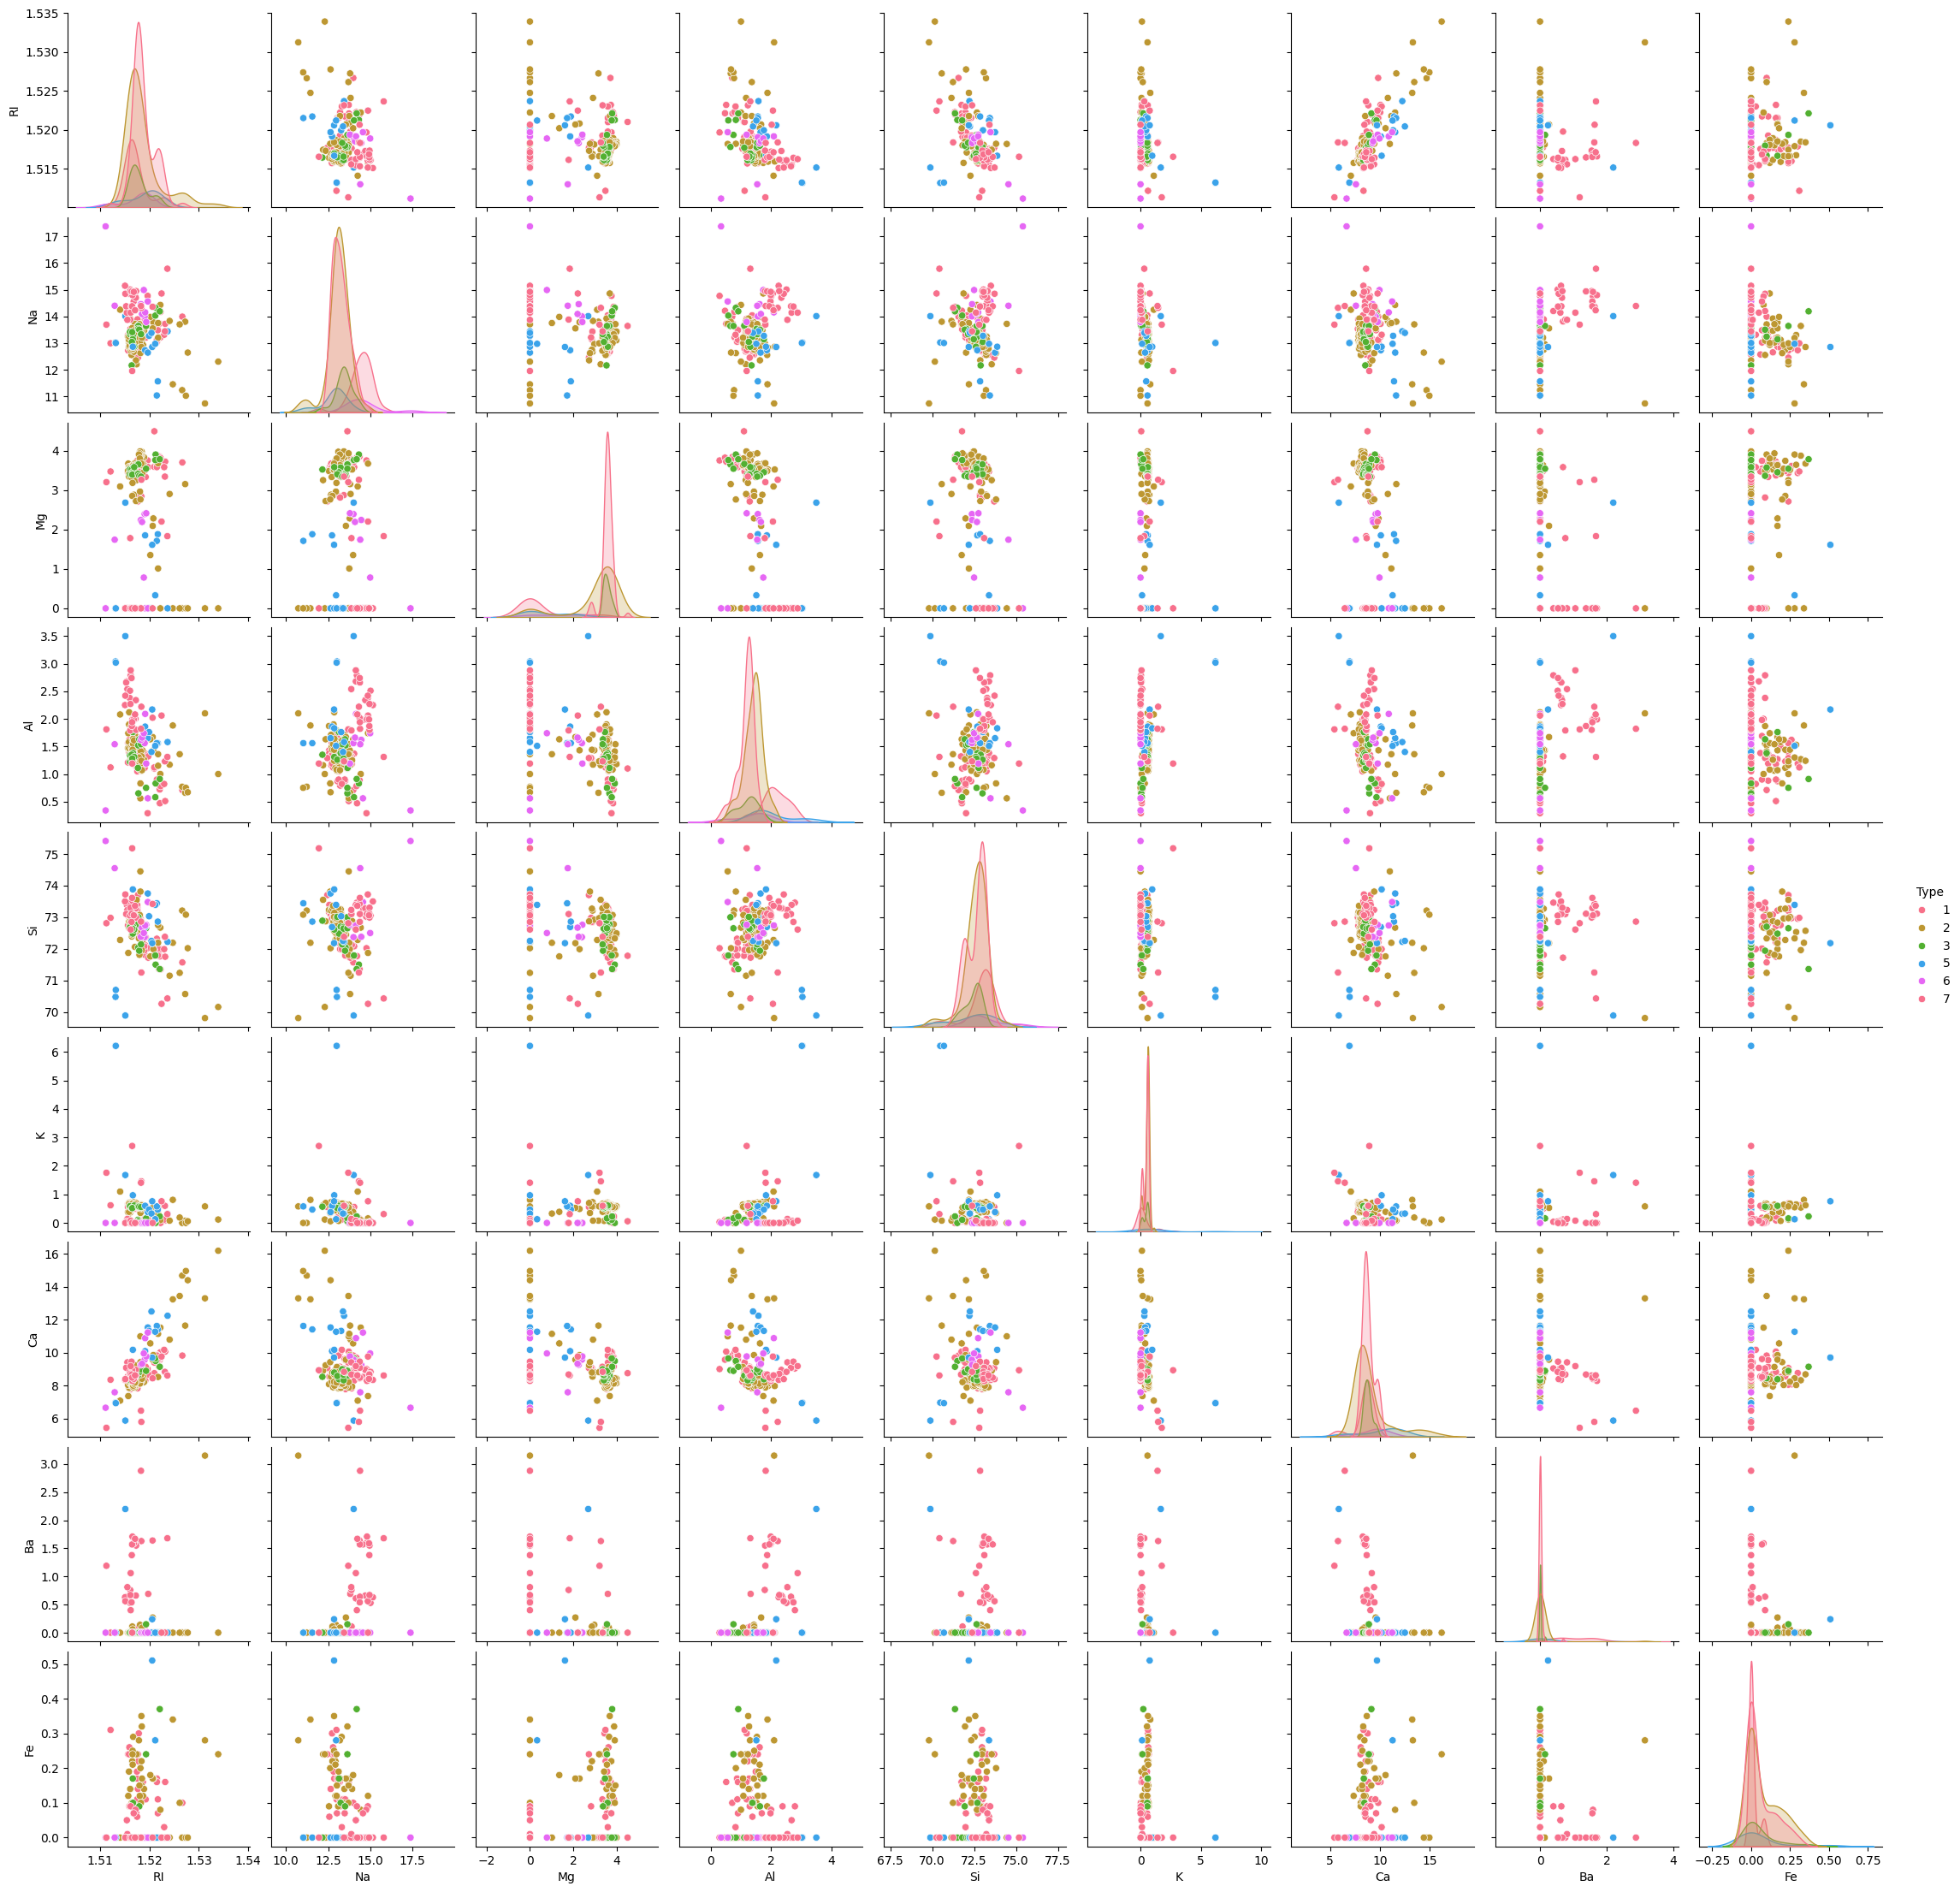

In [42]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, hue='Type',palette="husl")
plt.show()

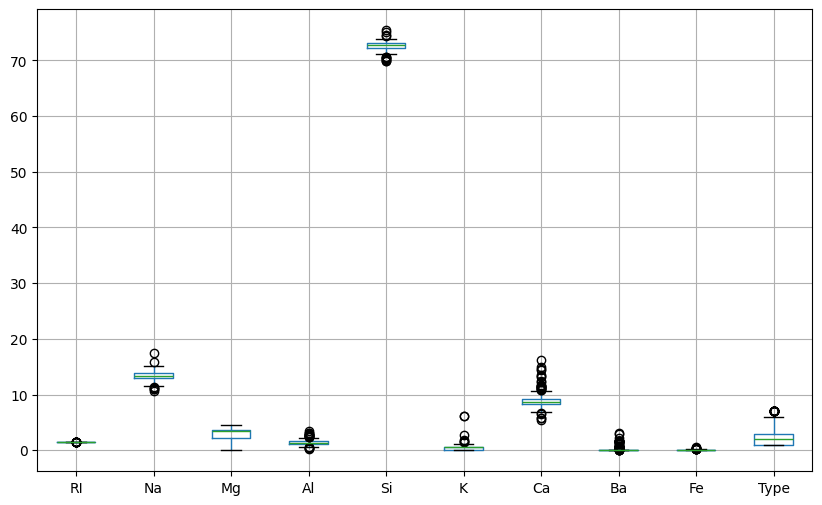

In [10]:
# Boxplots to check for outliers
df.boxplot(figsize=(10,6))
plt.show()

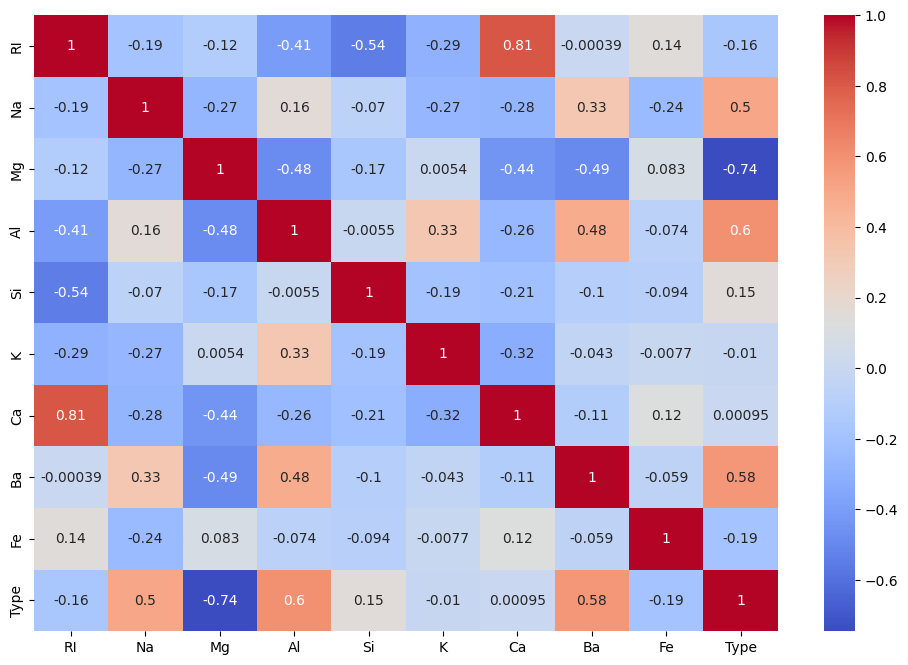

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3: Data Preprocessing
    1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
    2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
    3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Type', axis=1))

In [14]:
# Converting the scaled features into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Type'] = df['Type']

In [15]:
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [16]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [17]:
# Apply SMOTE to handle imbalance in the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df_scaled.drop('Type', axis=1), df_scaled['Type'])

In [18]:
# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_res, columns=df.columns[:-1])
df_resampled['Type'] = y_res

In [19]:
df_resampled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
451,-0.945943,0.749727,-1.865511,2.353275,0.863367,-0.599522,0.187242,1.058032,-0.257043,7
452,-0.500808,1.813936,-1.865511,1.092426,0.557772,-0.763919,-0.384212,2.848559,-0.517748,7
453,-0.724518,-0.915534,-1.865511,0.493269,2.337117,1.926716,0.106372,0.252625,-0.548305,7
454,-0.425934,1.831948,-1.865511,0.839213,0.490213,-0.763919,-0.321339,2.878583,-0.586451,7


## 4: Random Forest Model Implementation
    1. Divide the data into train and test split.
    2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
    3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [20]:
X = df_resampled.drop('Type', axis=1)
y = df_resampled['Type']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [25]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8540145985401459
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.57      0.67        30
           2       0.76      0.76      0.76        25
           3       0.61      1.00      0.76        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       0.96      0.96      0.96        28

    accuracy                           0.85       137
   macro avg       0.86      0.88      0.86       137
weighted avg       0.87      0.85      0.85       137

Confusion Matrix:
 [[17  5  8  0  0  0]
 [ 4 19  1  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 23  0]
 [ 0  1  0  0  0 27]]


## 5: Bagging and Boosting Methods
    Apply the Bagging and Boosting methods and compare the results.


In [28]:
# Initialize Bagging Classifier with the correct argument name
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)

In [29]:
# Train the model
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [30]:
# Predict on the test set
y_pred_bagging = bagging.predict(X_test)

In [31]:
# Evaluate the model
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging)}")
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("Bagging Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

Bagging Accuracy: 0.8540145985401459
Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.53      0.64        30
           2       0.80      0.80      0.80        25
           3       0.56      1.00      0.72        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      0.96      0.98        28

    accuracy                           0.85       137
   macro avg       0.86      0.88      0.86       137
weighted avg       0.87      0.85      0.85       137

Bagging Confusion Matrix:
 [[16  4 10  0  0  0]
 [ 4 20  1  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 23  0]
 [ 0  1  0  0  0 27]]


In [37]:
# Initialize AdaBoost Classifier with the SAMME algorithm
boosting = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')

In [38]:
# Train the model
boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)

In [39]:
# Predict on the test set
y_pred_boosting = boosting.predict(X_test)

In [40]:
# Evaluate the model
print(f"Boosting Accuracy: {accuracy_score(y_test, y_pred_boosting)}")
print("Boosting Classification Report:\n", classification_report(y_test, y_pred_boosting))
print("Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boosting))

Boosting Accuracy: 0.635036496350365
Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.57      0.50        30
           2       0.46      0.44      0.45        25
           3       0.23      0.21      0.22        14
           5       0.62      0.29      0.40        17
           6       1.00      1.00      1.00        23
           7       0.90      1.00      0.95        28

    accuracy                           0.64       137
   macro avg       0.61      0.59      0.59       137
weighted avg       0.64      0.64      0.63       137

Boosting Confusion Matrix:
 [[17  4  8  1  0  0]
 [10 11  2  2  0  0]
 [11  0  3  0  0  0]
 [ 0  9  0  5  0  3]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  0 28]]


# Additional Notes:

### 1. Explain Bagging and Boosting methods. How is it different from each other.

**Bagging and Boosting** are both ensemble techniques but differ in how they operate:

- **Bagging (Bootstrap Aggregating):**
    - It builds multiple models from different subsets of the data and aggregates their predictions.
        Example: Random Forest is an example of Bagging.
    - It reduces variance by averaging out models, thus decreasing the risk of overfitting.

- **Boosting:**
    - It builds models sequentially, where each model tries to correct the errors of the previous ones.
        Example: AdaBoost is a Boosting technique.
    - It reduces both bias and variance by focusing on difficult-to-classify samples, but it can be prone to overfitting if not controlled.

### 2. Explain how to handle imbalance in the data.

**Resampling Techniques**

- **Oversampling the Minority Class:** To balance the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) was applied. SMOTE generates synthetic samples for the minority class by interpolating between existing minority instances. This helps to increase the representation of the minority class without simply duplicating existing instances, which could lead to overfitting.
- **Undersampling the Majority Class:** While not implemented in this specific analysis, another common technique is undersampling, where some instances of the majority class are removed to balance the class distribution. However, this approach can lead to information loss if not carefully managed.
- **Combining Over- and Undersampling:** Combining SMOTE with undersampling can create a more balanced dataset by both increasing the minority class and reducing the majority class. This approach balances the class distribution while minimizing the risk of overfitting or losing important information.

**Algorithmic Approaches**

- **Cost-Sensitive Learning:** Instead of altering the dataset, we can modify the learning algorithm to account for the imbalance. By assigning a higher penalty to misclassifications of the minority class, the algorithm is incentivized to focus more on correctly predicting the minority class. In the analysis, a RandomForestClassifier was used with the class_weight parameter set to 'balanced', which automatically adjusts the weights of each class inversely proportional to their frequencies in the data. This approach helps to mitigate the effects of imbalance by ensuring the model pays more attention to the minority class during training.

**Evaluation Metrics**


- **Precision, Recall, and F1-Score:** Since accuracy can be misleading, other metrics such as precision, recall, and F1-score were considered. These metrics provide a more nuanced view of model performance, especially for imbalanced datasets. Precision measures the accuracy of positive predictions, recall measures the ability to identify all positive instances, and the F1-score balances these two by calculating their harmonic mean.
- **Confusion Matrix:** The confusion matrix was used to visualize the performance of the model, showing the number of true positives, true negatives, false positives, and false negatives. This helps in understanding how well the model is performing across both the majority and minority classes.